**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt export persistence](#toc3_1_)    
    - 3.1.1. [Effect on Foreign Economy and Prices](#toc3_1_1_)    
  - 3.2. [National accouting - quantities](#toc3_2_)    
  - 3.3. [National accouting - prices](#toc3_3_)    
  - 3.4. [Labor market](#toc3_4_)    
  - 3.5. [Capital accumulation](#toc3_5_)    
  - 3.6. [Production firms](#toc3_6_)    
  - 3.7. [Phillips curve](#toc3_7_)    
  - 3.8. [Government](#toc3_8_)    
  - 3.9. [Households - aggregate](#toc3_9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Export shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-v0_8-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') # create an instance of the model

In [3]:
par = model.par                 #set model parameters
ss = model.ss                   #create namespace for steady state
sol = model.sol                 #create namespace for solution

In [4]:
parameter = 'gamma_X'                                                       #set parameter 
parvalues = [0.,0.5,0.75]                                                   #set parameter values
par.t_b = 0                                                                 #flexible tax rate
par.delta_B = 0                                                             #flexible tax rate
ModelList = model.multi_model(parameter,parvalues,constant_wage = True)     #create a list of model. One for each value.

Jacobian calculated in 1.0 mins 7 secs
Jacobian calculated in 26.2 secs
Jacobian calculated in 25.7 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

In [5]:
Tshock = 50                                                 #length of shock
persistence = 0.80**np.arange(Tshock)                       #persistence of shock
Priceshock = 0.005                                          #size of shock

In [6]:
for i in range(len(ModelList)):
    ModelList[i].set_exo_ss()                                                                                   #set steady state exogenous variables
    ModelList[i].set_unknowns_ss()                                                                              #set steady state unknown variables

    ModelList[i].sol.chi[:Tshock] = ModelList[i].ss.chi + 2*Priceshock*ModelList[i].ss.chi*persistence          #shock to foreign demand shifter
    ModelList[i].sol.P_F[:Tshock] = ModelList[i].ss.P_F + Priceshock*ModelList[i].ss.P_F*persistence            #shock to foreign prices
    ModelList[i].sol.P_M_C[:Tshock] = ModelList[i].ss.P_M_C + Priceshock*ModelList[i].ss.P_M_C*persistence      #shock to consumption import prices
    ModelList[i].sol.P_M_G[:Tshock] = ModelList[i].ss.P_M_G + Priceshock*ModelList[i].ss.P_M_G*persistence      #shock to government consumption import prices
    ModelList[i].sol.P_M_I[:Tshock] = ModelList[i].ss.P_M_I + Priceshock*ModelList[i].ss.P_M_I*persistence      #shock to investment import prices
    ModelList[i].sol.P_M_X[:Tshock] = ModelList[i].ss.P_M_X + Priceshock*ModelList[i].ss.P_M_X*persistence      #shock to export import prices

    ModelList[i].find_IRF()                                                                                     #find impulse response functions


initial:
t1-t0 = 0.02789 secs
it = 3
    max. abs. error = 3.49e-11
    7.12e-12 in A_R_ini_error
    7.02e-14 in Aq_diff
    2.09e-12 in FOC_capital_agency
    9.32e-12 in FOC_K_ell
    3.49e-11 in mkt_clearing
    6.30e-13 in PC

solve: t1-t0 = 0.09834 secs
evaluate + update: t3-t2 = 0.06608 secs
initial:
t1-t0 = 0.02921 secs
it = 3
    max. abs. error = 2.98e-12
    8.73e-13 in A_R_ini_error
    6.66e-15 in Aq_diff
    4.35e-13 in FOC_capital_agency
    1.33e-12 in FOC_K_ell
    2.98e-12 in mkt_clearing
    3.75e-14 in PC

solve: t1-t0 = 0.07785 secs
evaluate + update: t3-t2 = 0.06434 secs
initial:
t1-t0 = 0.02816 secs
it = 3
    max. abs. error = 3.61e-12
    2.35e-13 in A_R_ini_error
    7.99e-15 in Aq_diff
    3.09e-14 in FOC_capital_agency
    6.79e-13 in FOC_K_ell
    3.61e-12 in mkt_clearing
    1.20e-13 in PC

solve: t1-t0 = 0.08611 secs
evaluate + update: t3-t2 = 0.06606 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt export persistence](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

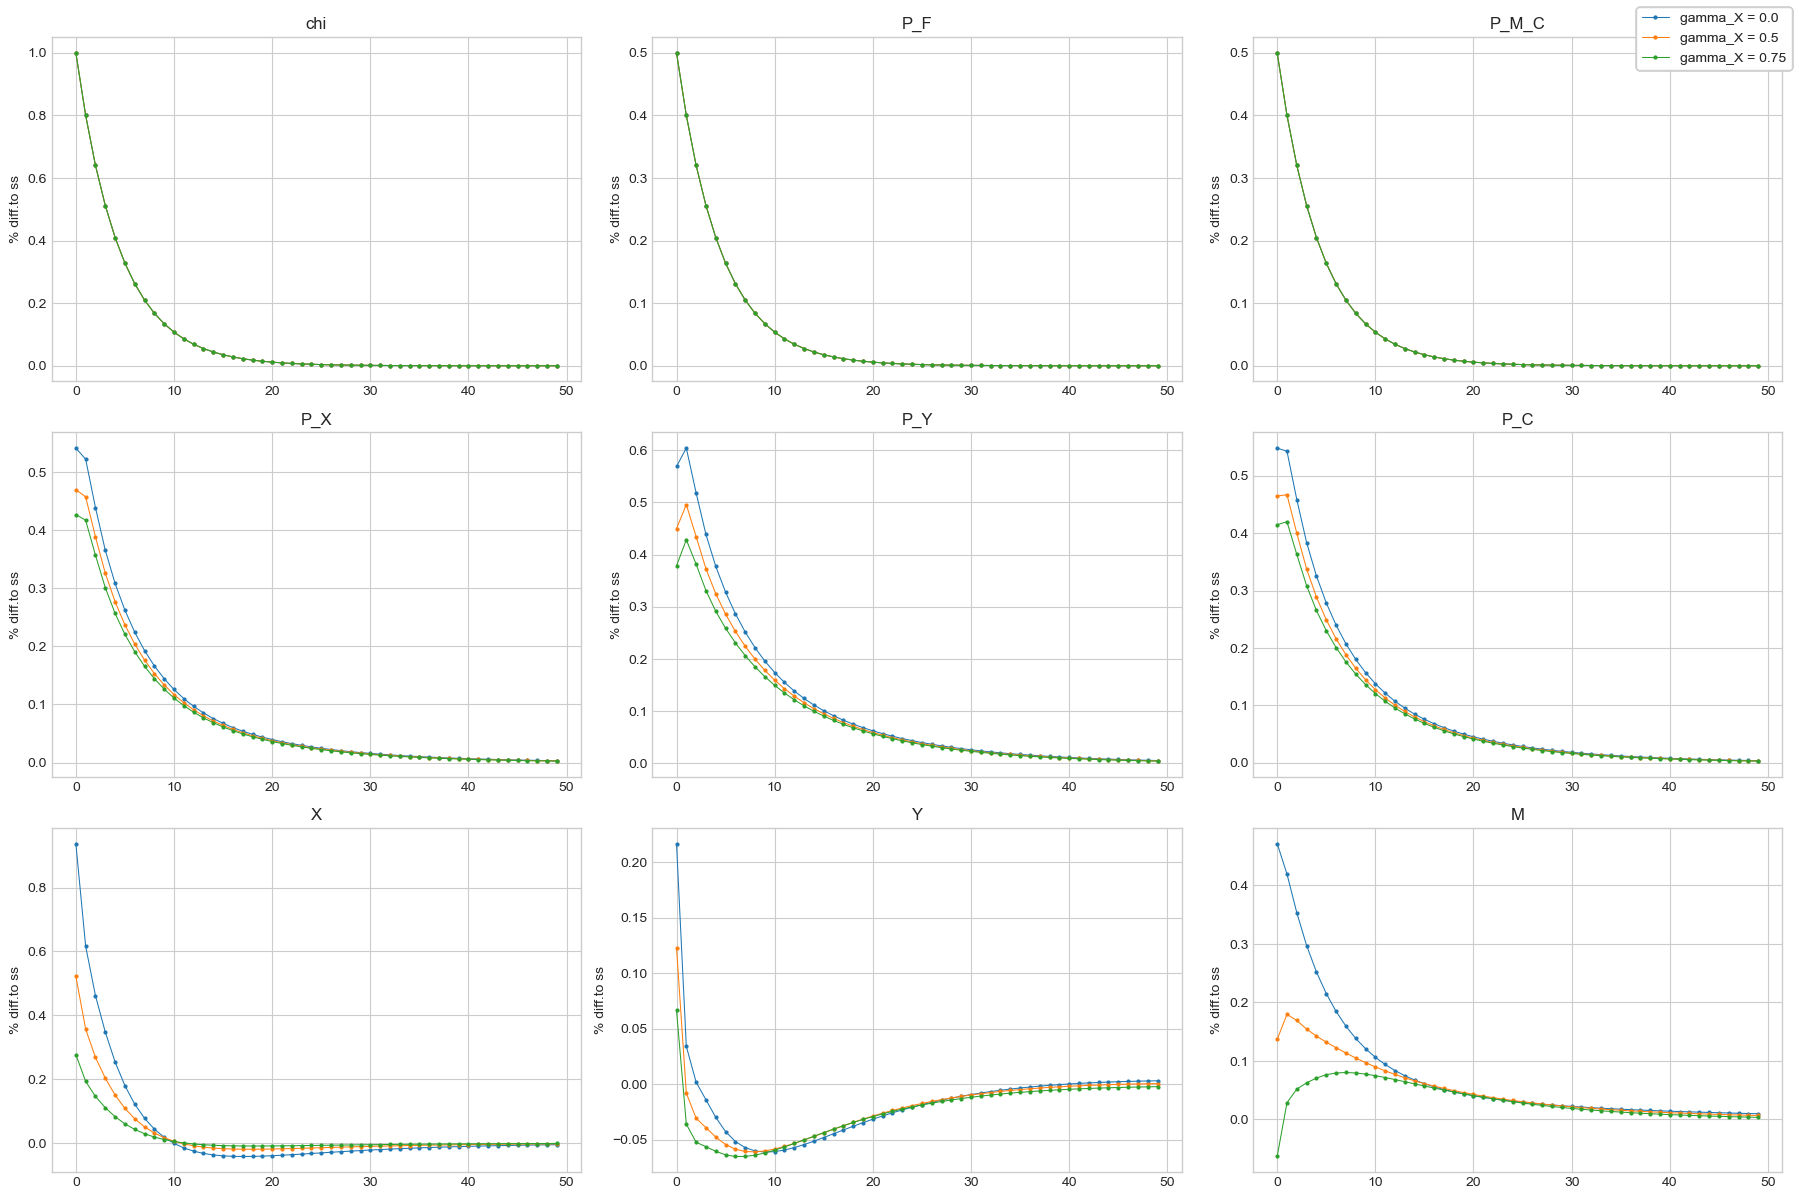

In [7]:
model.plot_IRF_models(ModelList,varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C', 'X', 'Y', 'M'],parameter=parameter,parvalues=parvalues)

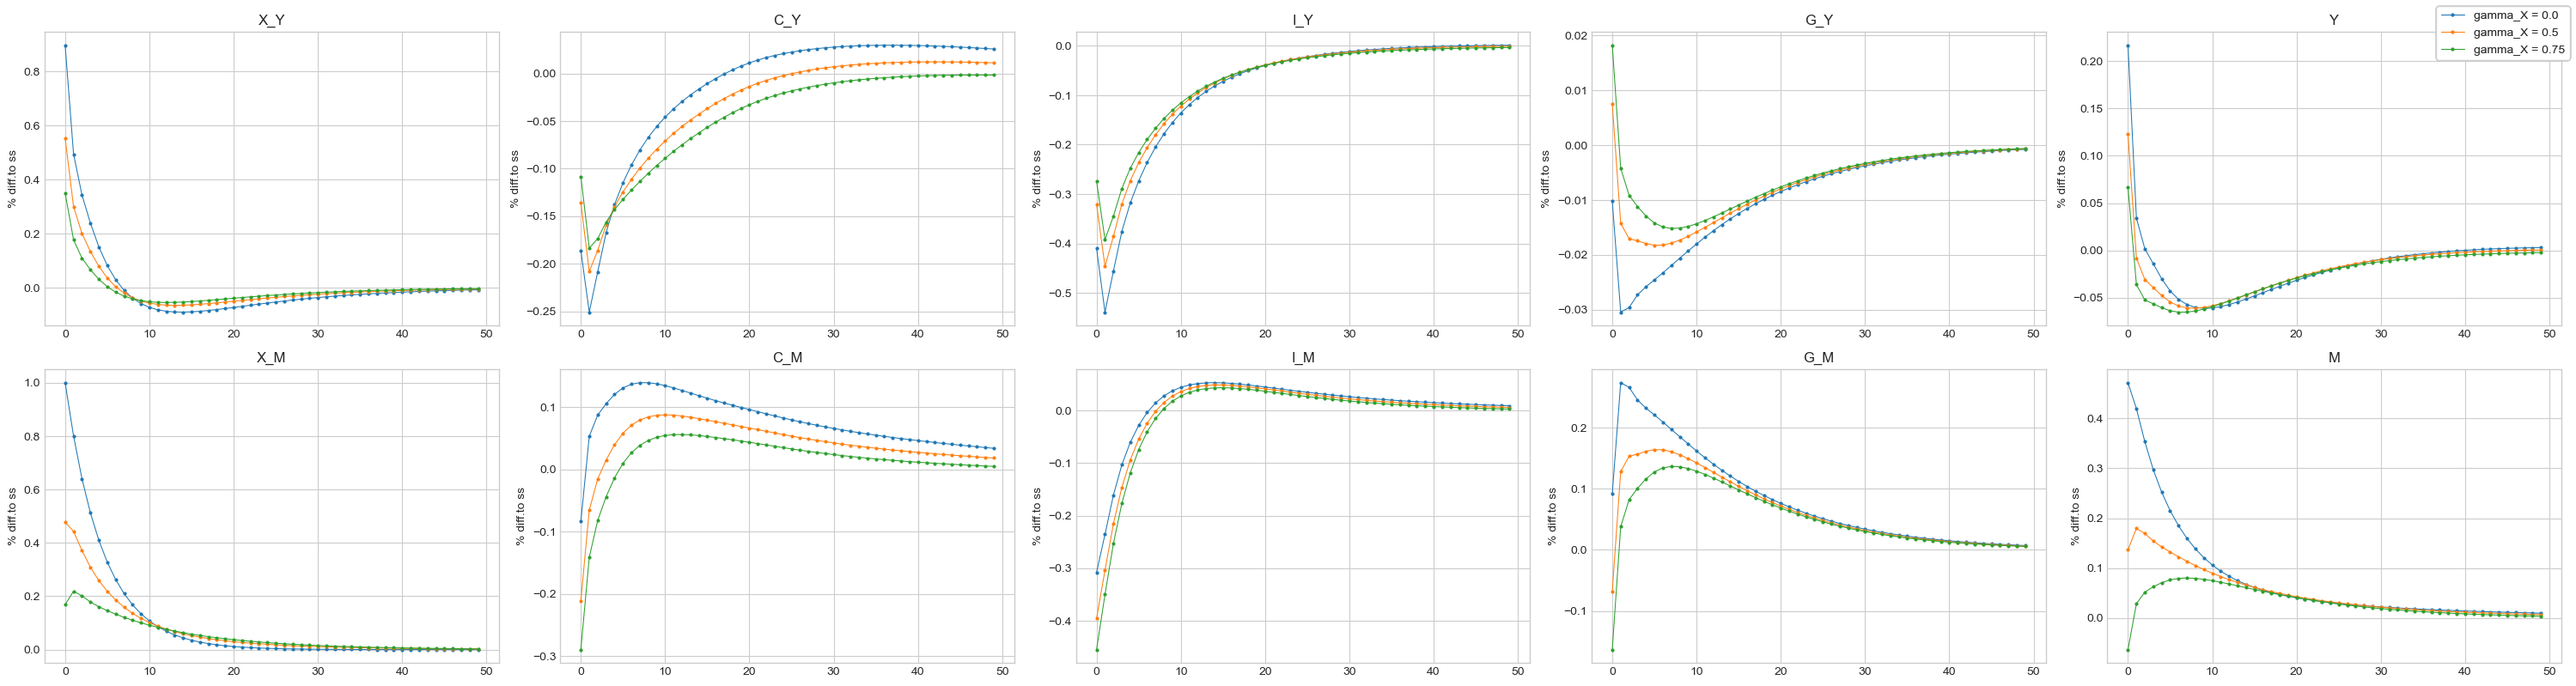

In [8]:
model.plot_IRF_models(ModelList,varlist=['X_Y','C_Y','I_Y','G_Y','Y','X_M','C_M','I_M','G_M','M'], ncol = 5,parameter=parameter,parvalues=parvalues)